In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2025-03-05 18:34:37.880630: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 18:34:39.771937: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 18:34:43.615722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-05 18:34:57.042569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Sample text data (small corpus)
corpus = [
    "I like deep learning",
    "Deep learning is powerful",
    "I use TensorFlow for ML projects",
    "TensorFlow is great for deep learning",
    "RNNs are good for sequential data"
]

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Convert text to sequences
sequences = []
for sentence in corpus:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        sequences.append(token_list[:i+1])  # Creating input-output pairs

# Pad sequences to make them of equal length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')

# Split into input (X) and output (y)
X, y = sequences[:, :-1], sequences[:, -1]

# Convert output labels to categorical
vocab_size = len(tokenizer.word_index) + 1
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

print("Vocabulary Size:", vocab_size)
print("Max Sequence Length:", max_sequence_length)


Vocabulary Size: 18
Max Sequence Length: 6


In [3]:
# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 10, input_length=max_sequence_length - 1),  # Embedding layer
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Output layer for word prediction
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=25, verbose=1)

model.save('./saved_model/Q_2.keras')

/home/esai/Desktop/python/env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0952 - loss: 2.8799
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1905 - loss: 2.8546
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1905 - loss: 2.8330
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2381 - loss: 2.8096
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2381 - loss: 2.7850
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2857 - loss: 2.7580
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3333 - loss: 2.7276
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3333 - loss: 2.6944
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3333 - loss: 2.6591
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3810 - loss: 2.6223
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3810 - loss: 2.5829
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.3810 - loss: 2.5420
E

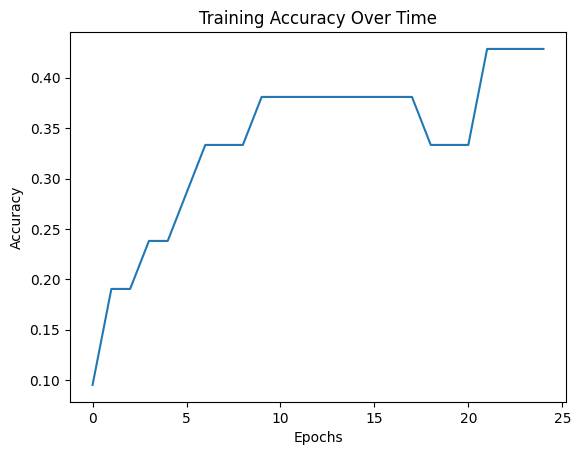

In [4]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.show()


In [8]:
def predict_next_word(model, tokenizer, text, max_sequence_length):
    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = pad_sequences([sequence], maxlen=max_sequence_length-1, padding='pre')
    
    predicted_index = np.argmax(model.predict(sequence), axis=-1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word
    return None

# Test the model
input_text = "I like"
predicted_word = predict_next_word(model, tokenizer, input_text, max_sequence_length)
print(f"Next word prediction: {predicted_word}")
print(f"==================== \n {input_text} {predicted_word}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Next word prediction: learning
 I like learning
